In [1]:
#import libraries 
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

#define constants
e = -4.8e-10 #electron charge in esu
me =9e-28 #electron mass in grams 
a0 = 5.3e-9 #Bohr radius  in cm

N = 100000 #number of steps 


In [52]:
#define function that integrates over time steps to return position, velocity, acceleration, and power spectrum 
#for an electron w/some intial velocity in the x direction

def step(x0,y0, v0, t_max):
    
    #initialize some time that the electron travels w a time step determined by the number of steps
    dt = t_max/N   # time step in seconds
    print("dt is:"+str(dt))
   
    
    # initialize arrays to store position and velocity
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    ax = np.zeros(N)
    ay = np.zeros(N)
    
    #also ones scaled by a0 for plotting 
    x_scaled = np.zeros(N)
    y_scaled = np.zeros(N)

    # Initial conditions
    x[0] = x0
    y[0] = y0
    vx[0] = v0
    vy[0] = 0  # Electron starts with zero velocity in the y-direction
   

    #iteration over N steps with length dt defined above 
    for i in range(1, N):
        
        # compute acceleration
        Z=1*e # define charge of ion in esu
        
        #decompose acc in x and y direction
        #theta = math.atan(y[i-1]/x[i-1]) 
        r = np.sqrt(x[i-1]**2 + y[i-1]**2)
        ax[i] = -Z * e * x[i-1] / (r**3 * me)
        ay[i] = -Z * e * y[i-1] / (r**3 * me)
        
        #print('ax and ay are:')
        #print(ax[i], ay[i])
        
        
        # update velocity
        vx[i] = vx[i-1] + ax[i] * dt
        vy[i] = vy[i-1] + ay[i] * dt
        #print(vx[i], vy[i])

        # update position
        x[i] = (x[i-1] + vx[i] * dt)  
        y[i] = (y[i-1] + vy[i] * dt)
    
        #scale position in terms of a0 for plotting
        x_scaled[i]= x[i]/a0
        y_scaled[i]= y[i]/a0
        
    # Compute power spectrum
    acc = np.sqrt(ax**2 + ay**2)  # magnitude of acceleration
    n = len(acc)
    acc_fft = fft(acc)            # fourier transform from position space to frequency space
    freq = fftfreq(n, d=dt)       #compute frequency range for x axis 
    power_spectrum = np.abs(acc_fft)**2   #compute power spectrum
    
    
    
    #plotting
    plt.figure(figsize=(14, 10))
    
    #plot electron trajectory
    plt.subplot(2, 2, 1)   
    plt.plot(x/a0, y/a0, label='Electron trajectory')
    plt.scatter(0, 0, color='red', label='Ion (Origin)')
    plt.scatter(x0/a0, y0/a0, color='green', label='Electron start')
    plt.xlabel('x ($a_0$)')
    plt.ylabel('y ($a_0$)')
    plt.xlim()
    plt.title('Electron trajectory')
    plt.legend()
    plt.grid(True)

    #plot velocity components
    plt.subplot(2, 2, 2)
    plt.plot(np.arange(N) * dt, vx, label='x-component of velocity')
    plt.plot(np.arange(N) * dt, vy, label='y-component of velocity')
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (cm/s)')
    plt.title('Velocity Components')
    plt.legend()
    plt.grid(True)


    #plot acceleration components
    plt.subplot(2, 2, 3)
    plt.plot(np.arange(N) * dt, ax, label='x-component of acceleration')
    plt.plot(np.arange(N) * dt, ay, label='y-component of acceleration')
    plt.xlabel('Time (s)')
    plt.ylabel('Acceleration (cm/s^2)')
    plt.title('Acceleration Components')
    plt.legend()
    plt.grid(True)

    #plot power spectrum 
    plt.subplot(2, 2, 4)
    plt.plot(freq, power_spectrum)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power Spectrum')
    plt.title('Power Spectrum of Radiation')
    #plt.yscale('log')
    #plt.xlim(-3e15,3e15) #zoom in on peak to see what it looks like 
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    

    #print(x_scaled)
    #print(y_scaled)
    

dt is:1.28e-19


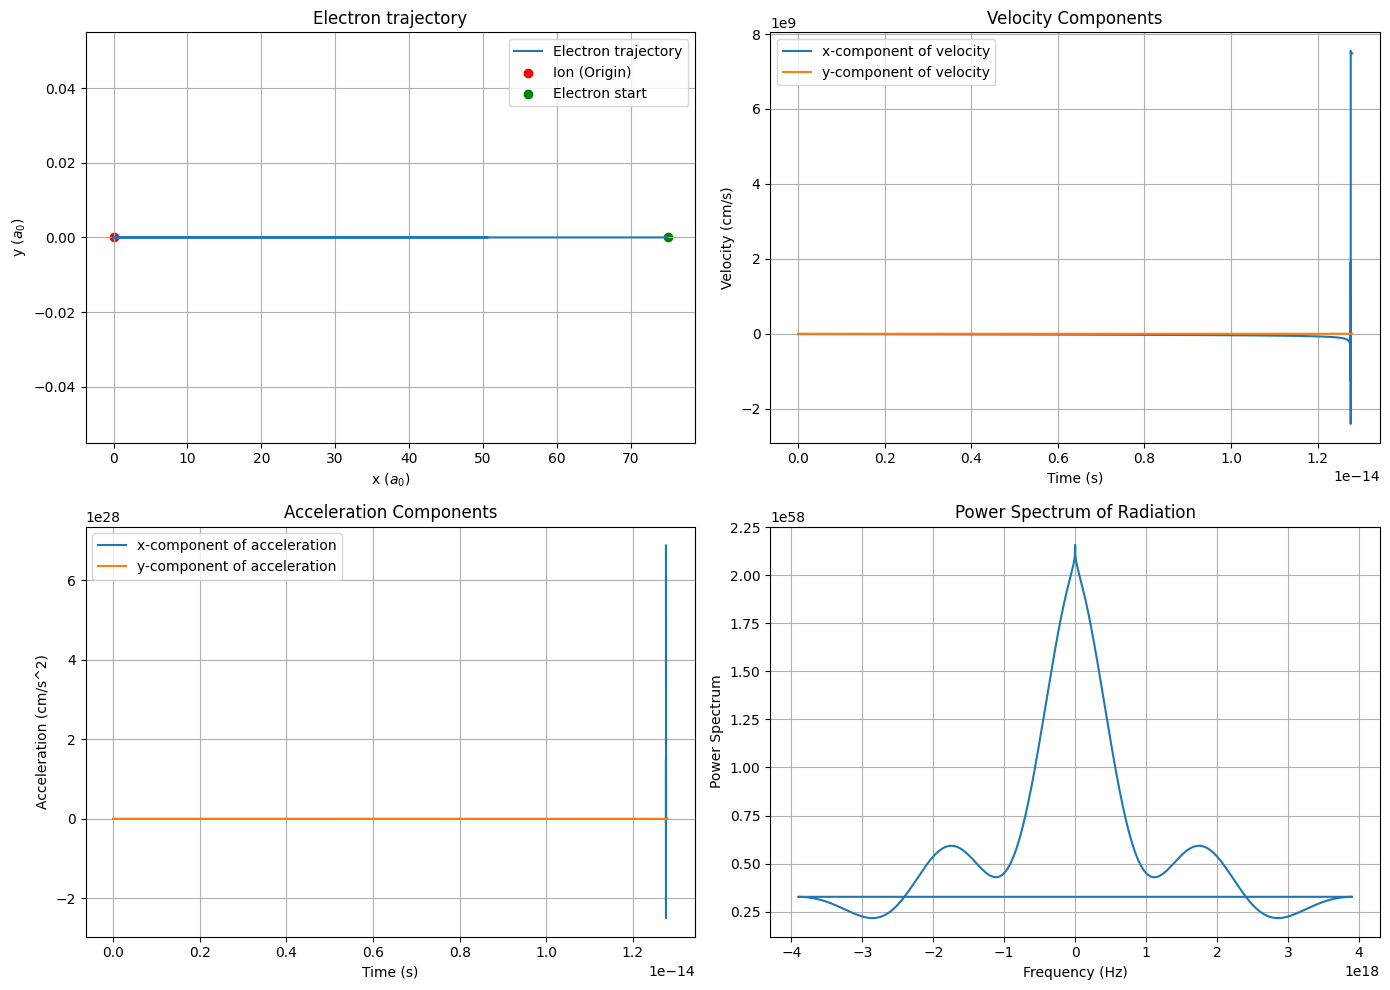

In [71]:
#plot config 1
#x0 = 75a0
#y0= 0
#v0=-1e7

step(75*a0, 0, -1e7, 1.28e-14)

dt is:2e-19


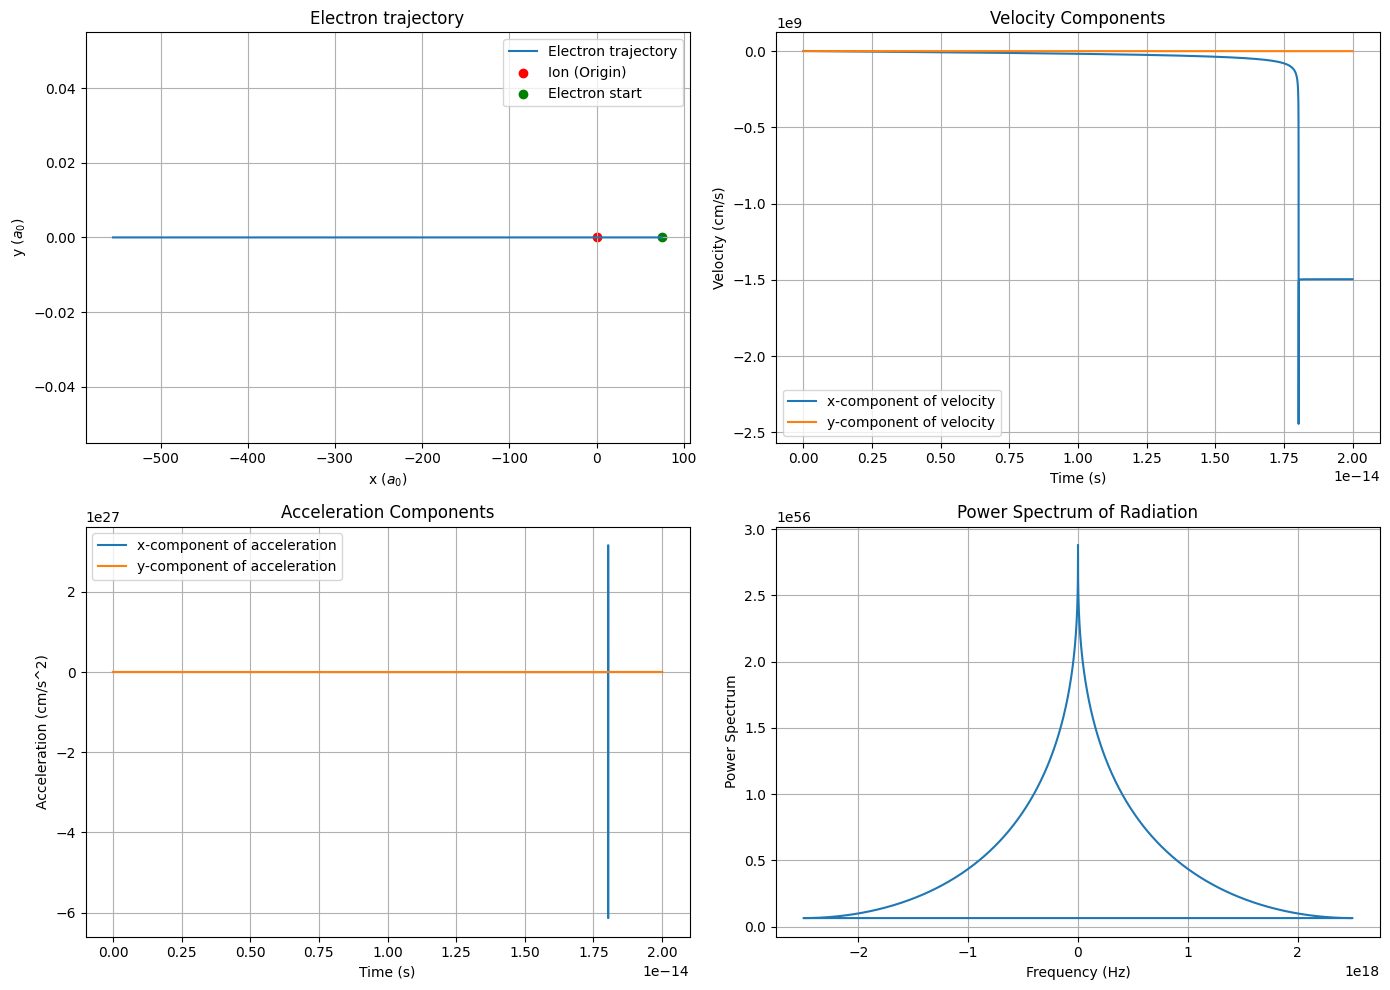

In [129]:
#plot config 2
#x0 = 75a0
#y0= 0
#v0=1e6
step(75*a0, 0, 1e6, 2e-14)

dt is:2e-19


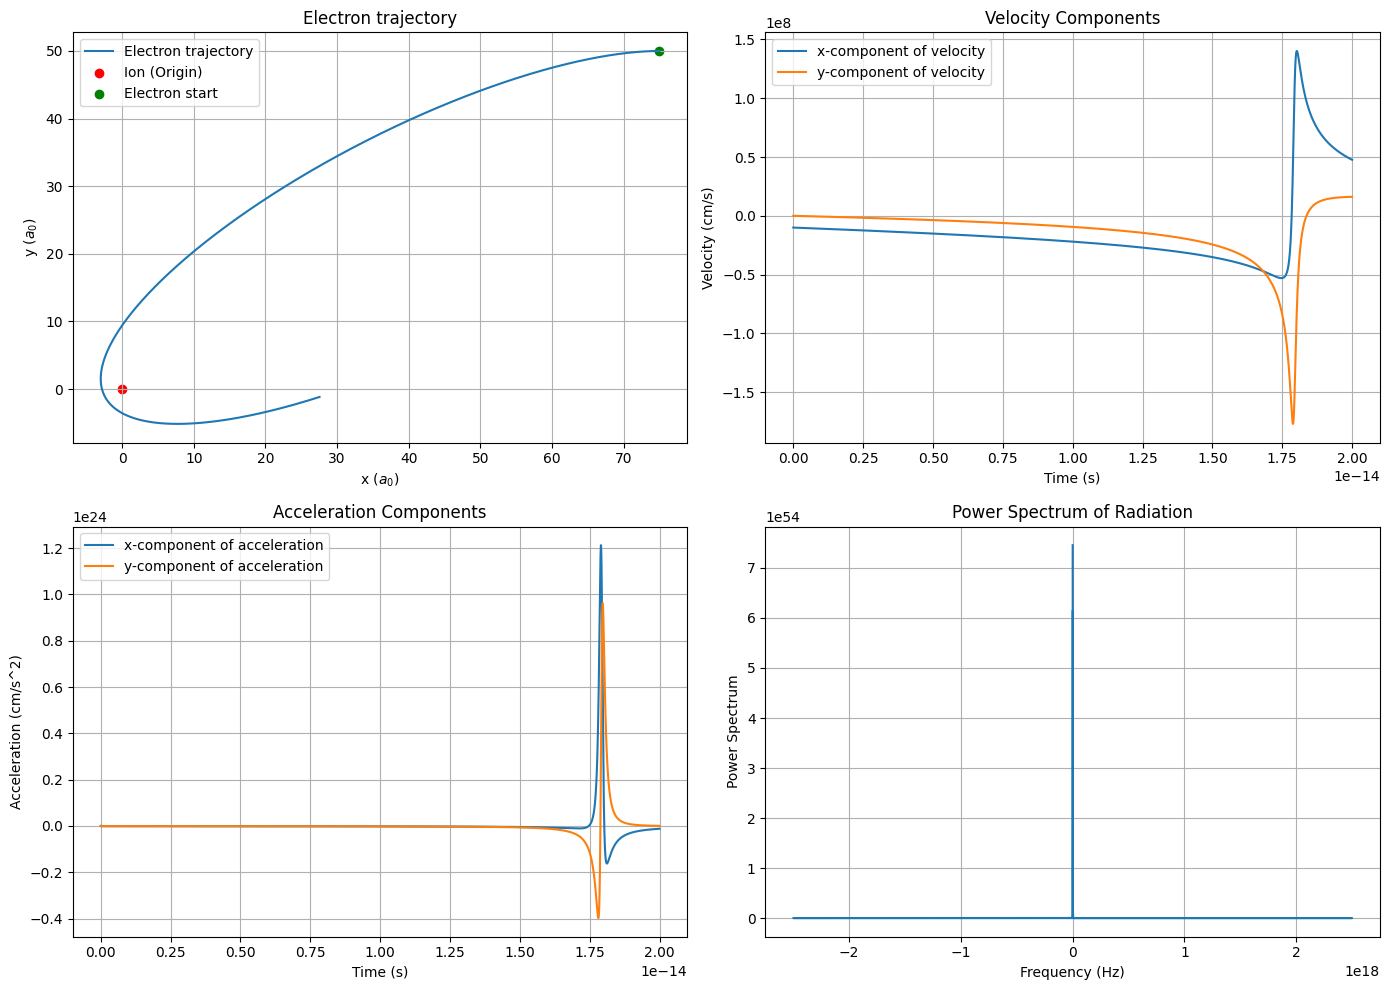

In [112]:
#plot config 3
#x0 = 75a0
#y0= 50a0
#v0=-1e7
step(75*a0,50*a0, -1e7, 2e-14)

dt is:2.3e-19


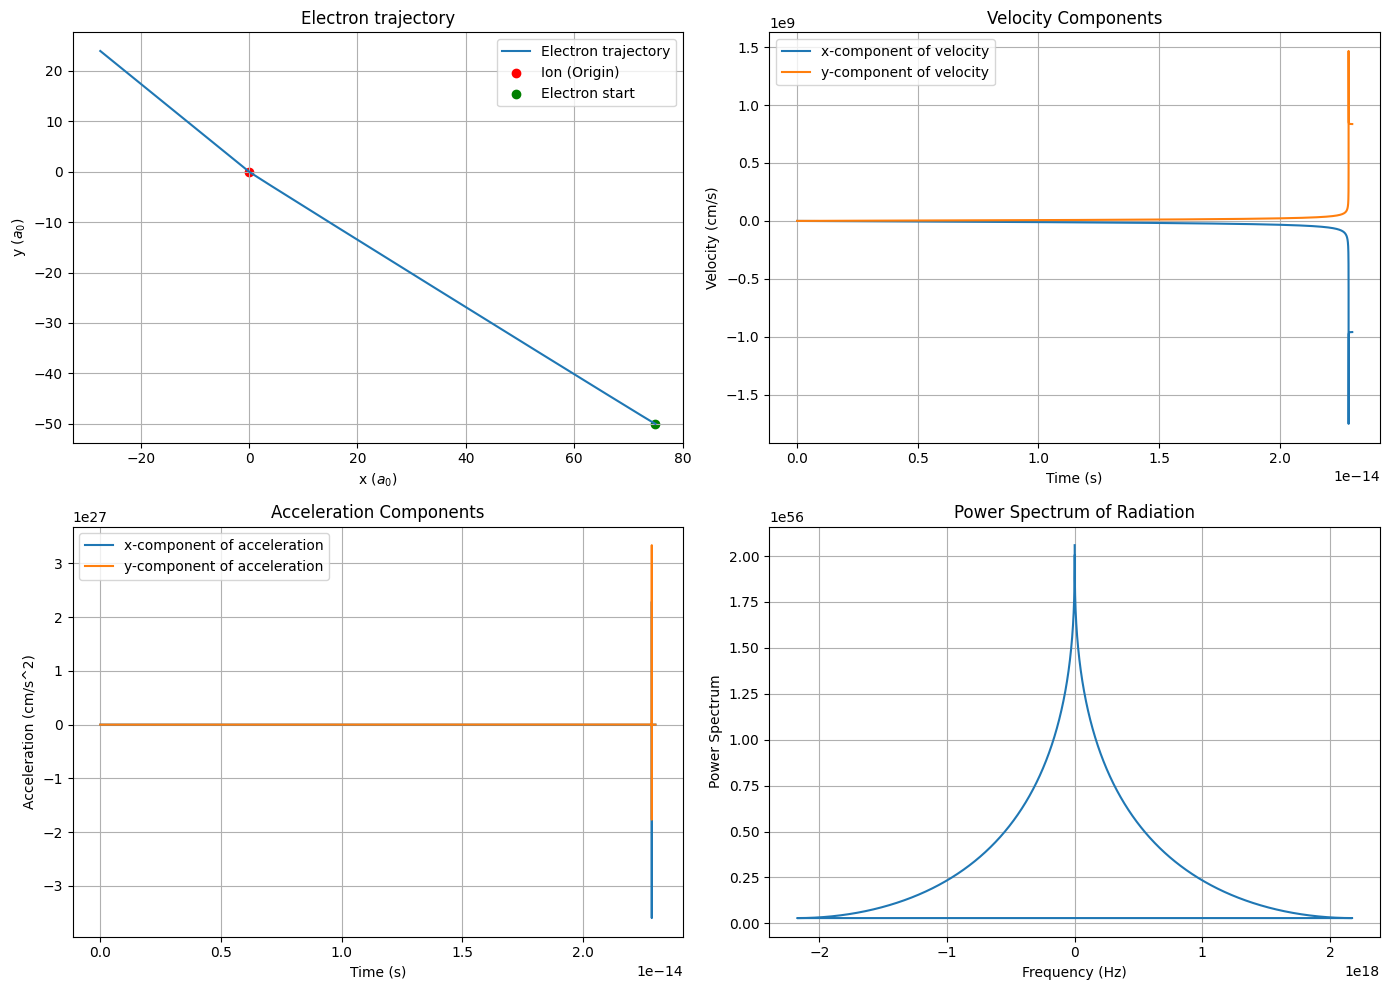

In [126]:
#plot config 4
#x0 = 75a0
#y0= -50a0
#v0=-1e5 
step(75*a0, -50*a0, -1e5, 2.3e-14)

dt is:5e-19


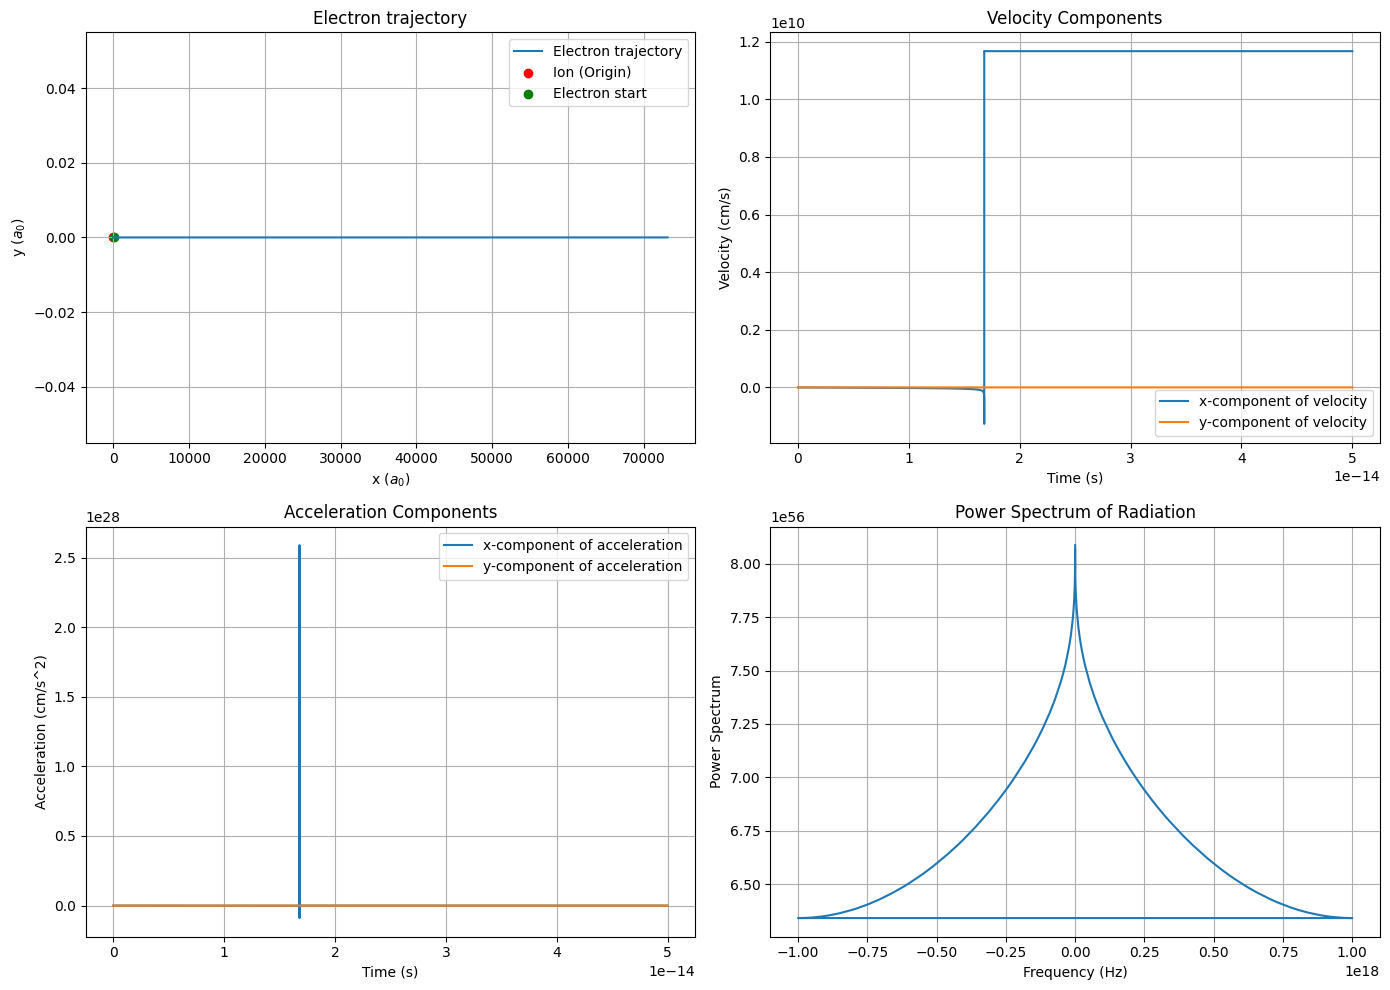

In [128]:
#plot config 5
#x0 = 75a0
#y0= 0
#v0=-1e6
step(75*a0, 0, -1e6, 5e-14)